<a href="https://colab.research.google.com/github/BeginnerTony/tonynew/blob/main/tony_first_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from fastdownload import download_url
from fastcore.all import *
print('imported')

imported


In [12]:
def search_images(item, max_n=100, **kwargs):
    url = 'https://duckduckgo.com/'
    res = urlread(url, data={'q':item})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=item, vqd=searchObj.group(1))
    urls, data = set(), {'next':1}
    while len(urls) < max_n and 'next' in data:
        data = urljson(requestUrl, data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
        return L(urls)[:max_n]

In [1]:
from fastai.vision.all import *
import os
from scipy.io import loadmat
path = untar_data(URLs.CARS)

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

data_set = loadmat(path/'cars_annos.mat')
annos = data_set['annotations'][0]
car_model = data_set['class_names'][0]
labels = {}
for a in annos:
  fname = str(a[0][0])
  index = int(a[5][0][0])
  labels[fname] = str(car_model[index - 1][0])

valid_labels = [x for x in get_image_files(path/'car_train') if x.name in labels]

def labelling(x): return labels[x.name]

dls = ImageDataLoaders.from_name_func(
    path/'car_train',
    get_image_files(str(path/'car_train')),
    valid_pct=0.2,
    label_func = labelling,
    item_tfms = Resize(192)
)
'''
os.listdir(path)'''
'''im_path = (path/'cars_train').ls()[0]
im = Image.open(im_path)
im.show()'''
'''im = PILImage.create(get_image_files(path/'cars_train')[0])
im.show()'''

'''dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=labelling,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

dls = dblock.dataloaders(path/'cars_train', bs=64)'''
dls.show_batch(max_n=9)


TypeError: 'NoneType' object is not iterable

In [70]:
from fastai.vision.all import *
from fastcore import *
from fastbook import *

types = 'grizzly', 'black', 'teddy', 'polar'
path = Path('bears')

if not path.exists():
  path.mkdir()
  for t in types:
    d = (path/t)
    d.mkdir(exist_ok=True)
    ims = search_images_ddg(f'{t} bears')
    print(len(ims))
    for n in ims:
      download_url(d, n)

'''ims = search_images_ddg('grizzly bear')
path = './images/bear.jpg'
download_url(ims[0], path)
im = Image.open(path)'''


"ims = search_images_ddg('grizzly bear')\npath = './images/bear.jpg'\ndownload_url(ims[0], path)\nim = Image.open(path)"

In [82]:
import shutil
shutil.rmtree(Path('bears'))

In [83]:
types = 'grizzly', 'black', 'teddy', 'polar'
path = Path('bears')

if not path.exists():
  path.mkdir(exist_ok=True)
  for t in types:
    d = (path/t)
    d.mkdir(exist_ok=True)
    ims = search_images_ddg(f'{t} bears')
    download_images(d, urls=ims)



In [84]:
im = get_image_files(path)
len(im)

741

In [85]:
failures = verify_images(im)
failures.map(Path.unlink)

(#41) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

In [86]:
len(failures)

41

<Axes: >

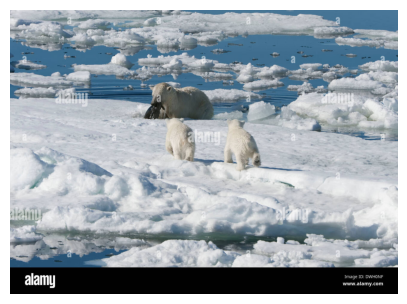

In [105]:
im = get_image_files(path/'polar')
im = PILImage.create(im[1])
im.show()

In [111]:
bears = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'),
    batch_tfms=aug_transforms(mult=2)
)
dls = bears.dataloaders(path)

In [119]:
learner = vision_learner(dls,resnet18, metrics=error_rate)

In [121]:
learner.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.825339,0.575739,0.164286,01:38


epoch,train_loss,valid_loss,error_rate,time
0,0.871009,0.336371,0.121429,01:53
1,0.771987,0.354299,0.107143,01:51
2,0.669400,0.337945,0.092857,01:52
3,0.626472,0.323219,0.071429,01:52
4,0.582937,0.313172,0.071429,01:51


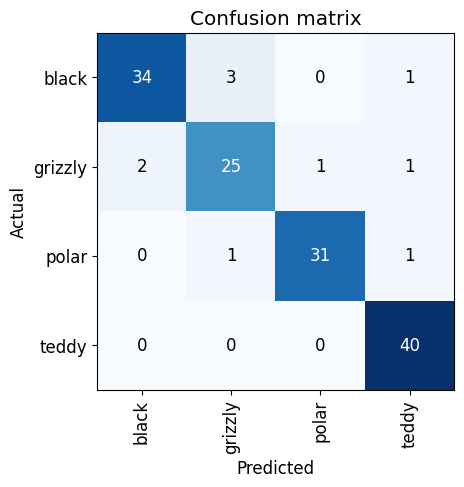

In [122]:
ClassificationInterpretation.from_learner(learner).plot_confusion_matrix()

In [128]:
test = search_images_ddg('baby polar bear')
download_url(test[0],'images/test_bear.jpg')

Path('images/test_bear.jpg')

In [129]:
learner.predict('images/test_bear.jpg')

('polar', tensor(2), tensor([3.1638e-05, 2.9271e-05, 9.9178e-01, 8.1563e-03]))

<Axes: >

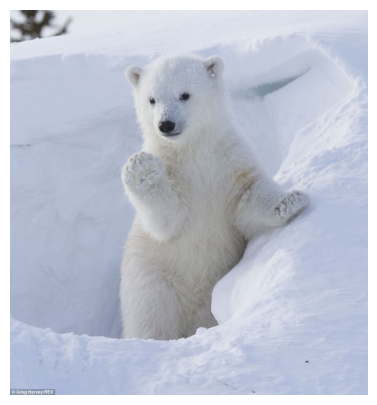

In [137]:
im = PILImage.create('images/test_bear.jpg')
im.show()

In [146]:
path = Path('models')
path.mkdir()
learner.export('models/my_model.pkl')

In [147]:
!ls /content/models

my_model.pkl
